<a href="https://colab.research.google.com/github/streakcraze/accident-detection-in-kenya/blob/main/1Dneuralnet_(with_sobel_edge_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Acquisition

In [1]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/accident-image-classification/dataset1/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/accident-image-classification/dataset1/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/accident-image-classification/dataset1/val"

In [2]:
import os

accident_train_images = os.listdir(os.path.join(train_dir, "Accident"))
nonaccident_train_images = os.listdir(os.path.join(train_dir, "Non Accident"))
accident_test_images = os.listdir(os.path.join(test_dir, "Accident"))
nonaccident_test_images = os.listdir(os.path.join(test_dir, "Non Accident"))
accident_val_images = os.listdir(os.path.join(val_dir, "Accident"))
nonaccident_val_images = os.listdir(os.path.join(val_dir, "Non Accident"))

print(f"accident train images are {len(accident_train_images)}")
print(f"non-accident train images are {len(nonaccident_train_images)}")
print(f"accident test images are {len(accident_test_images)}")
print(f"non-accident test images are {len(nonaccident_test_images)}")
print(f"accident val images are {len(accident_val_images)}")
print(f"non-accident val images are {len(nonaccident_val_images)}")

accident train images are 369
non-accident train images are 422
accident test images are 47
non-accident test images are 53
accident val images are 46
non-accident val images are 52


# 2. Data Preprocessing

In [3]:
import numpy as np
from skimage import io, color, filters, transform
import matplotlib.pyplot as plt
import gc

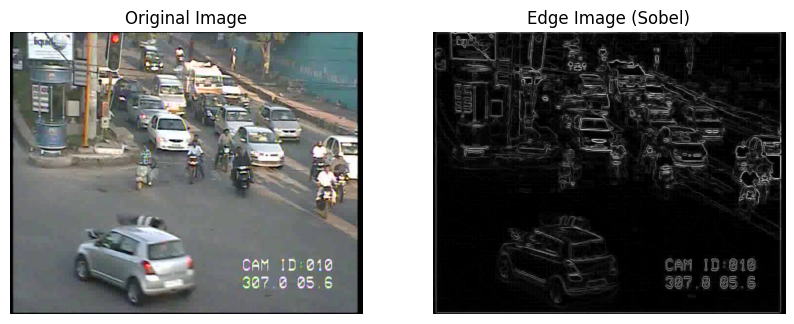

In [4]:
accident_train_img = io.imread(os.path.join(train_dir, "Accident", accident_train_images[1]))
accident_train_gray = color.rgb2gray(accident_train_img)

# applying Sobel edge detection
accident_train_edges = filters.sobel(accident_train_gray)

# plotting the original and grayscale images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(accident_train_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(accident_train_edges, cmap='gray')
plt.title('Edge Image (Sobel)')
plt.axis('off')

plt.show()

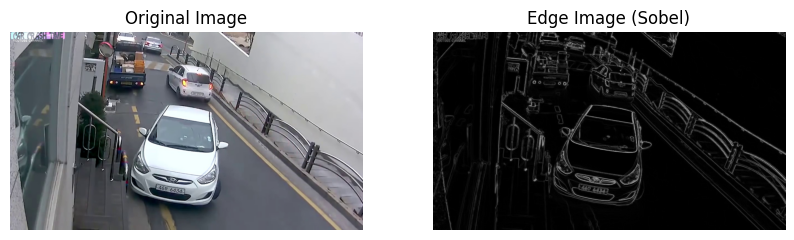

In [5]:
nonaccident_train_img = io.imread(os.path.join(train_dir, "Non Accident", nonaccident_train_images[1]))
nonaccident_train_gray = color.rgb2gray(nonaccident_train_img)

# applying Sobel edge detection
nonaccident_train_edges = filters.sobel(nonaccident_train_gray)

# plotting the original and grayscale images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(nonaccident_train_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nonaccident_train_edges, cmap='gray')
plt.title('Edge Image (Sobel)')
plt.axis('off')

plt.show()

In [6]:
train_features = np.array([])
# "0" for accident and "1" for nonaccident
train_labels = np.append(np.full(369, 0), np.full(422, 1))

In [7]:
accident_train_features = []

print("loading accident training images ...")

for img in accident_train_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join(train_dir, "Accident", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # applying Sobel edge detection
  edge_img = filters.sobel(gray_img)
  # resize the image
  resized_img = transform.resize(edge_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  accident_train_features.append(flat_img)

train_features = np.vstack(accident_train_features)
del accident_train_features
gc.collect()
print("loaded accident training images successfully")

loading accident training images ...
loaded accident training images successfully


In [8]:
nonaccident_train_features = []

print("loading non-accident training images ...")

for img in nonaccident_train_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join(train_dir, "Non Accident", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # applying Sobel edge detection
  edge_img = filters.sobel(gray_img)
  # resize the image
  resized_img = transform.resize(edge_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  nonaccident_train_features.append(flat_img)

train_features = np.append(train_features, nonaccident_train_features, axis=0)
del nonaccident_train_features
gc.collect()
print("loaded non-accident training images successfully")

loading non-accident training images ...
loaded non-accident training images successfully


In [9]:
from sklearn.decomposition import PCA

In [10]:
print("applying principal component analysis ...")
pca = PCA(n_components=0.9)
pca.fit(train_features)

principal_train_features = pca.transform(train_features)
print(f"features reduced from {len(train_features[0])} to {len(principal_train_features[0])}")

del train_features
gc.collect()
print("principal component analysis completed")

applying principal component analysis ...
features reduced from 2500 to 29
principal component analysis completed


# 3. Model Training

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

In [12]:
model = Sequential()

# Input layer
model.add(Dense(128, input_shape=(pca.n_components_,), activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))

# Output layer with 1 neuron and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
print("model training started")
# Train the model
model.fit(principal_train_features, train_labels, epochs=10, batch_size=32)

joblib.dump(model, "/content/drive/MyDrive/Colab Notebooks/accident-image-classification/image_classifier_1Dneuralnet(2).sav")
del principal_train_features
del train_labels
gc.collect()
print("model artifact saved")

model training started
Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5234
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5335
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5335
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5335
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5335
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5335
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5335
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5335
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5335
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5

# 4. Model Evaluation

In [14]:
test_features = np.array([])
# "0" for accident and "1" for nonaccident
test_labels = np.append(np.full(47, 0), np.full(53, 1))

In [15]:
accident_test_features = []

print("loading accident test images ...")

for img in accident_test_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join(test_dir, "Accident", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # applying Sobel edge detection
  edge_img = filters.sobel(gray_img)
  # resize the image
  resized_img = transform.resize(edge_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  accident_test_features.append(flat_img)

test_features = np.vstack(accident_test_features)
del accident_test_features
gc.collect()
print("loaded accident test images successfully")

loading accident test images ...
loaded accident test images successfully


In [16]:
nonaccident_test_features = []

print("loading non-accident test images ...")

for img in nonaccident_test_images:
  # load the RGB image
  rgb_img = io.imread(os.path.join(test_dir, "Non Accident", img))
  # convert RGB to grayscale
  gray_img = color.rgb2gray(rgb_img)
  # applying Sobel edge detection
  edge_img = filters.sobel(gray_img)
  # resize the image
  resized_img = transform.resize(edge_img, (50, 50))
  # normalize the image
  normalized_img = resized_img / 255.0
  # flatten the image array
  flat_img = normalized_img.flatten()
  # append to features list
  nonaccident_test_features.append(flat_img)

test_features = np.append(test_features, nonaccident_test_features, axis=0)
del nonaccident_test_features
gc.collect()
print("loaded non-accident test images successfully")

loading non-accident test images ...
loaded non-accident test images successfully


In [17]:
print("applying principal component analysis ...")
principal_test_features = pca.transform(test_features)
print(f"features reduced from {len(test_features[0])} to {len(principal_test_features[0])}")

del test_features
gc.collect()
print("principal component analysis completed")

applying principal component analysis ...
features reduced from 2500 to 29
principal component analysis completed


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
# testing the model
labels_pred = model.predict(principal_test_features)
binary_labels_pred = (labels_pred > 0.5).astype(int)

# calculating the accuracy of the model
accuracy = accuracy_score(binary_labels_pred, test_labels)
print(f"The model is {accuracy*100}% accurate")

4/4 [==============================] - 0s 3ms/step
The model is 53.0% accurate


In [20]:
# printing the classification report
print("Classification report:")
print(classification_report(test_labels, binary_labels_pred, target_names=['accident', 'non-accident']))

Classification report:
              precision    recall  f1-score   support

    accident       0.00      0.00      0.00        47
non-accident       0.53      1.00      0.69        53

    accuracy                           0.53       100
   macro avg       0.27      0.50      0.35       100
weighted avg       0.28      0.53      0.37       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


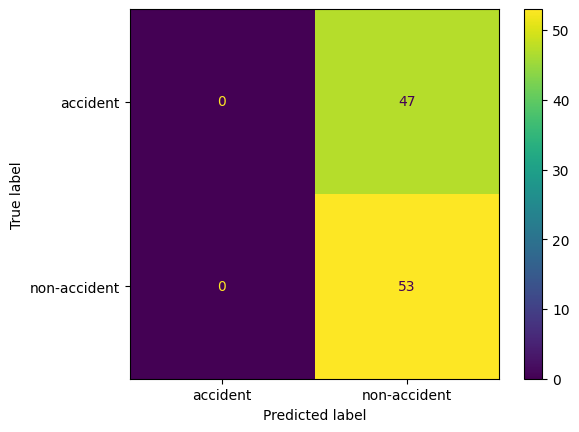

In [21]:
# plotting the confusion matrix
cm = confusion_matrix(test_labels, binary_labels_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["accident", "non-accident"])
cm_display.plot()
plt.show()

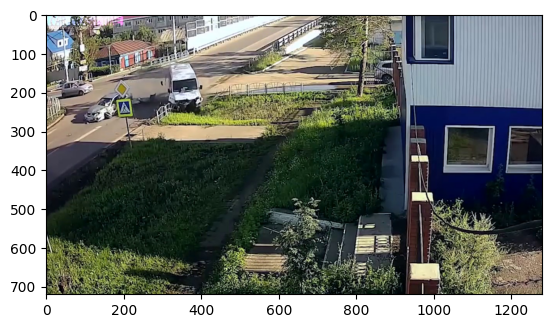

1/1 [==============================] - 0s 26ms/step
Model says it is non-accident


In [22]:
accident_val_img = io.imread(os.path.join(val_dir, "Accident", accident_val_images[35]))

plt.imshow(accident_val_img)
plt.show()

gray_test_img = color.rgb2gray(accident_val_img)
edge_test_img = filters.sobel(gray_test_img)
resized_test_img = transform.resize(edge_test_img, (50, 50))
normalized_test_img = resized_test_img / 255.0
flat_test_img = normalized_test_img.flatten()

transformed_sample = pca.transform([flat_test_img])

img_pred = model.predict(transformed_sample)

if(img_pred > 0.5):
    print("Model says it is non-accident")
else:
    print("Model says it is accident")


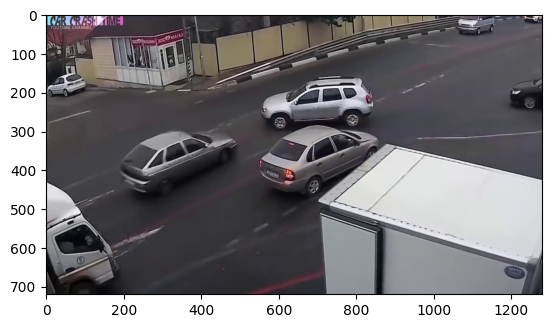

1/1 [==============================] - 0s 34ms/step
Model says it is non-accident


In [23]:
nonaccident_val_img = io.imread(os.path.join(val_dir, "Non Accident", nonaccident_val_images[51]))

plt.imshow(nonaccident_val_img)
plt.show()

gray_test_img = color.rgb2gray(nonaccident_val_img)
edge_test_img = filters.sobel(gray_test_img)
resized_test_img = transform.resize(edge_test_img, (50, 50))
normalized_test_img = resized_test_img / 255.0
flat_test_img = normalized_test_img.flatten()

transformed_sample = pca.transform([flat_test_img])

img_pred = model.predict(transformed_sample)

if(img_pred > 0.5):
    print("Model says it is non-accident")
else:
    print("Model says it is accident")
